In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
# getting the fashion mnist datasets from keras.datasets API
mnist = tf.keras.datasets.fashion_mnist

In [3]:
# By loading we get the training and test data
# In this case we have the gray scale images
(training_data , training_labels), (testing_data, testing_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


3
(28, 28)


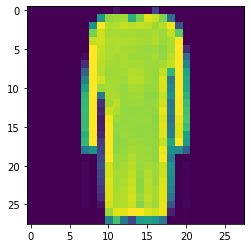

In [4]:
# Visualize the data
import matplotlib.pyplot as plt
plt.imshow(training_data[25])
print(training_labels[25])
print((training_data[25]).shape)

In [5]:
# Note : Neural Network works better with normalized data thats why we need to normalize the data
training_data = training_data / 255.0
testing_data = testing_data / 255.0

In [6]:
# Create the neural network
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax) # 10 is for 10 labels
                                    ])

In [13]:
# Callbacks to setup the thresholds for training. If that is reached than the training stops
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.93):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

In [14]:
# Compile and train the model
callbacks = myCallback()
model.compile(optimizer='adamax',loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.fit(training_data,training_labels,epochs = 20,callbacks=[callbacks])

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2059 - accuracy: 0.9265
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2003 - accuracy: 0.9277
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1973 - accuracy: 0.9298
Epoch 4/20
1859/1875 [============================>.] - ETA: 0s - loss: 0.1943 - accuracy: 0.9302
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1939 - accuracy: 0.9304


In [9]:
model.evaluate(testing_data,testing_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3176


0.31762388348579407